In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [421]:
df=pd.read_csv("monet.csv")
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [422]:
df.shape

(430, 6)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


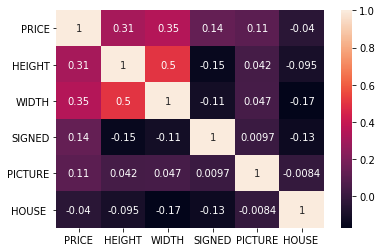

In [424]:
sns.heatmap(df.corr(), annot=True)

In [425]:
df_upd = df
df_upd["SIZE"]=df.HEIGHT*df.WIDTH
df_upd.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


**Linear Regression Model1
HEIGHT vs PRICE**




In [426]:
X = np.log(df_upd["HEIGHT"].values.reshape(-1,1))
y = np.log(df_upd["PRICE"].values.reshape(-1,1))

In [427]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [428]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

In [429]:
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
y_pred[:5]

array([[ 0.87371584],
       [ 0.14167614],
       [ 2.42867113],
       [ 0.95949543],
       [-0.04363427]])

In [430]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.1283192378878861

In [431]:
X_train.shape

(344, 1)

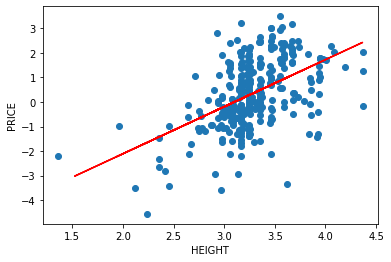

In [432]:
plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("HEIGHT")
plt.ylabel("PRICE")
plt.show()

**LINEAR REGRESSION MODEL2 SIZE vs PRICE**

In [433]:
X = np.log(df_upd["SIZE"].values.reshape(-1,1))
y = np.log(df_upd["PRICE"].values.reshape(-1,1))

In [434]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

In [436]:
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
y_pred[:5]

array([[ 1.06671745],
       [ 0.25233107],
       [ 2.99776067],
       [ 0.7193035 ],
       [-0.16792519]])

In [437]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.0993644393930797

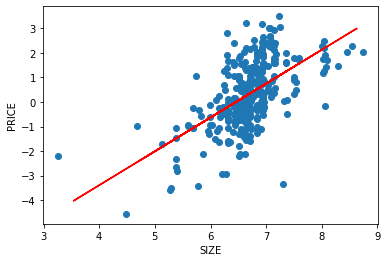

In [438]:
plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("SIZE")
plt.ylabel("PRICE")
plt.show()

***MULTIVARIATE LINEAR REGRESSION MODEL***

In [439]:
X = np.log(df_upd[["HEIGHT","WIDTH","PICTURE","HOUSE ","SIZE"]])
y = np.log(df_upd["PRICE"]).values.reshape(-1,1)

In [440]:
X.shape

(430, 5)

In [441]:
y.shape

(430, 1)

In [442]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [443]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

In [444]:
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
y_pred[:5]

array([[ 1.06625468],
       [ 0.28500468],
       [ 3.06625468],
       [ 0.78500468],
       [-0.15249532]])

In [445]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.0925411497298851